# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [108]:
import pandas as pd
import numpy as np 

from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from plotnine import *

In [109]:
df = load_penguins()

In [110]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [111]:
df.dropna(inplace=True)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [112]:
df['year']= LabelEncoder().fit_transform(df['year'])

In [113]:
X = df.drop(['bill_depth_mm'],axis=1)
y = df['bill_depth_mm']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25)

In [114]:
ct = ColumnTransformer(
    transformers=[
        ('standardize', StandardScaler(),['bill_length_mm','flipper_length_mm','body_mass_g']),
        ('encoding',OneHotEncoder(drop='first',sparse_output= False),['species','island','sex'])
    ], remainder='passthrough'
)

In [115]:
def analysis(modelName):
    ct = ColumnTransformer(
    transformers=[
        ('standardize', StandardScaler(),['bill_length_mm','flipper_length_mm','body_mass_g']),
        ('encoding',OneHotEncoder(drop='first'),['species','island','sex'])
    ], remainder='passthrough'
)
    model =  Pipeline(
        steps= [
            ('columnTransforme', ct),
            ('Model',modelName)
        ]
    )
    model.fit(X_train,y_train)

    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)

    mse_train = mean_squared_error(y_train,model_train_pred)
    mse_test = mean_squared_error(y_test,model_pred)
    
    return mse_train,mse_test

In [116]:
lr = analysis(LinearRegression())
kn =analysis(KNeighborsRegressor(n_neighbors=5))
kn2 = analysis(KNeighborsRegressor(n_neighbors=10))
dt = analysis(DecisionTreeRegressor())

In [117]:
error_values = []
error_type =[]
modelList = [lr,kn,kn2,dt]
for model in modelList:
    error_values.extend([model[0], model[1]])
    error_type.extend(["Training Error", "Test Error"])


In [118]:
plotDf= pd.DataFrame({
    "Model": ['LR','LR','KNR5','KNR5','KNR10','KNR10','DT','DT'],
    "Error Type": error_type,
    "Mean Squared Error": error_values
})

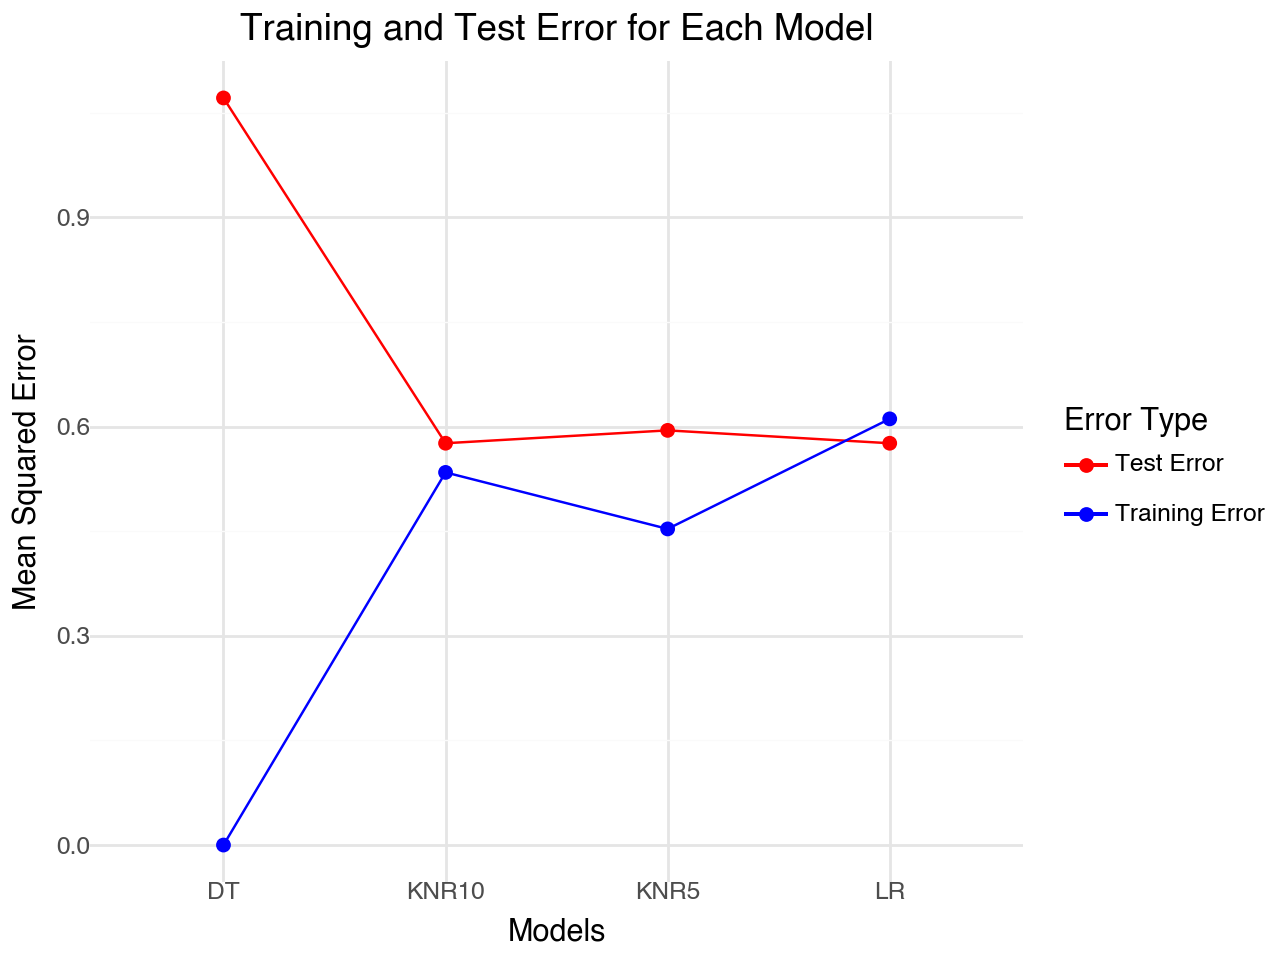

In [120]:

plot = (
    ggplot(plotDf, aes(x='Model', y='Mean Squared Error', color='Error Type', group='Error Type'))
    + geom_line()
    + geom_point(size=2)
    + labs(title="Training and Test Error for Each Model",
           x="Models",
           y="Mean Squared Error")
    + scale_color_manual(values={"Training Error": "blue", "Test Error": "red"})
    + theme_minimal()
)
plot